In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Get to know the data

In [3]:
housing= pd.read_csv('BostonHousing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### CRIM – per capita crime rate by town 
### ZN – proportion of residential land zoned for lots over 25,000 sq.ft 
### INDUS – proportion of non-retail business acres per town 
### CHAS – Charles River dummy variable (1 if tract bounds river; else 0)
### NOX – nitric oxides concentration (parts per 10 million) 
### RM – average number of rooms per dwelling
### AGE – proportion of owner-occupied units built prior to 1940
### DIS – weighted distances to five Boston employment centres 
### RAD – index of accessibility to radial highways 
### TAX – full-value property-tax rate per 10,000 dollar
### PTRATIO – pupil-teacher ratio by town 
### B – 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
### LSTAT – % lower status of the population 
### MEDV – Median value of owner-occupied homes in (dollar) 1000’s



# 2. Data preparing

## 2.1 Check if there is missing value

In [8]:
missing_info= round(housing.isna().sum() * 100/housing.shape[0], 2)
missing_info

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

## 2.2 Check the distribution of the house price

<Axes: xlabel='medv', ylabel='Density'>

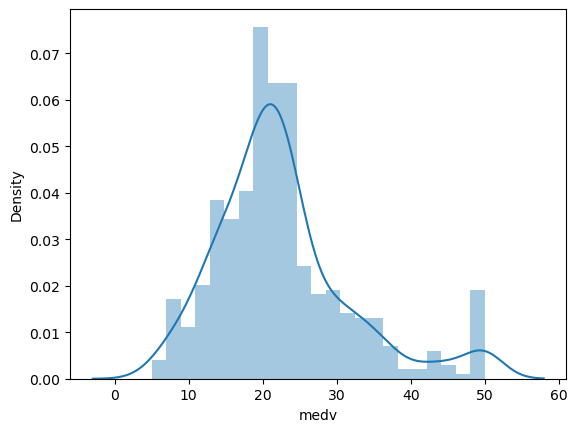

In [11]:
sns.distplot(housing['medv'])

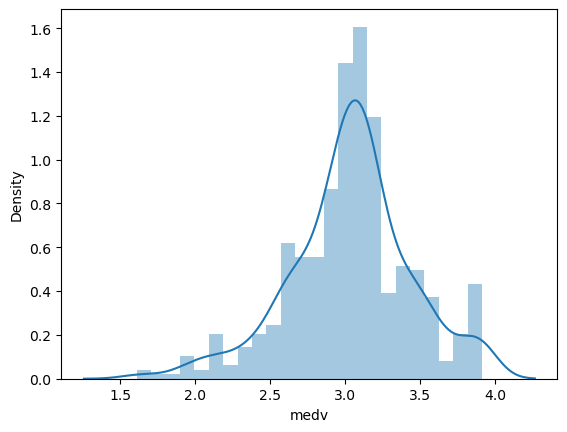

In [14]:
sns.distplot(np.log(housing['medv']))
plt.show()

In [22]:
housing['medv_log_trans']= np.log(housing['medv'])
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_log_trans
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3.178054
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3.072693
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,3.546740
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3.508556
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,3.589059


## 2.3 Check the outliers

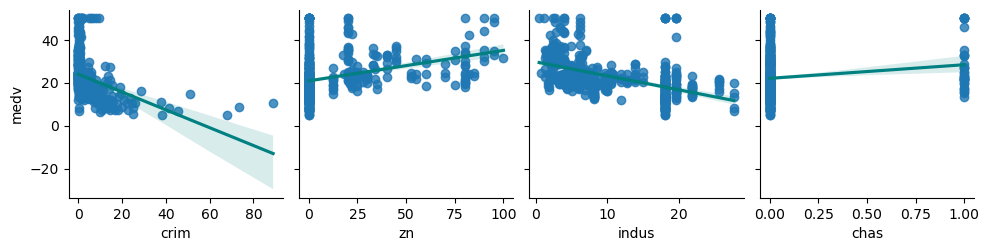

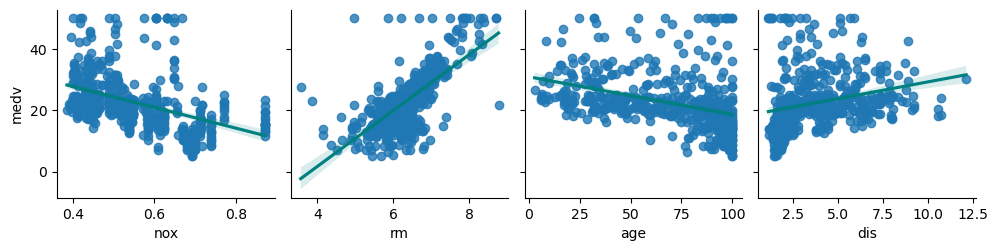

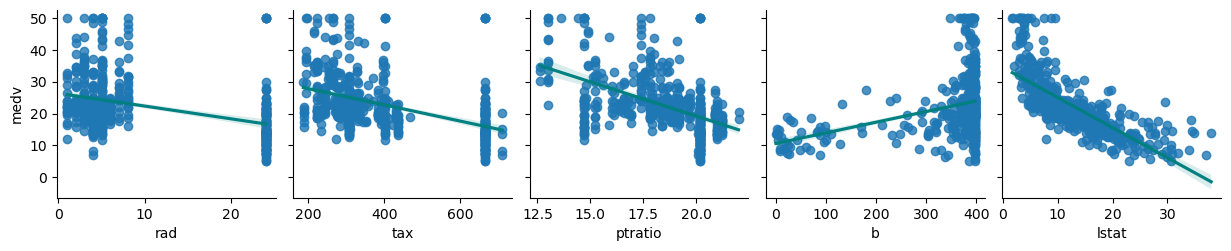

In [43]:
cols= ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']

sns.pairplot(housing, x_vars=['crim','zn','indus','chas'], y_vars='medv', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(housing, x_vars=['nox','rm','age','dis'], y_vars='medv', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(housing, x_vars=['rad','tax','ptratio','b','lstat'], y_vars='medv', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})


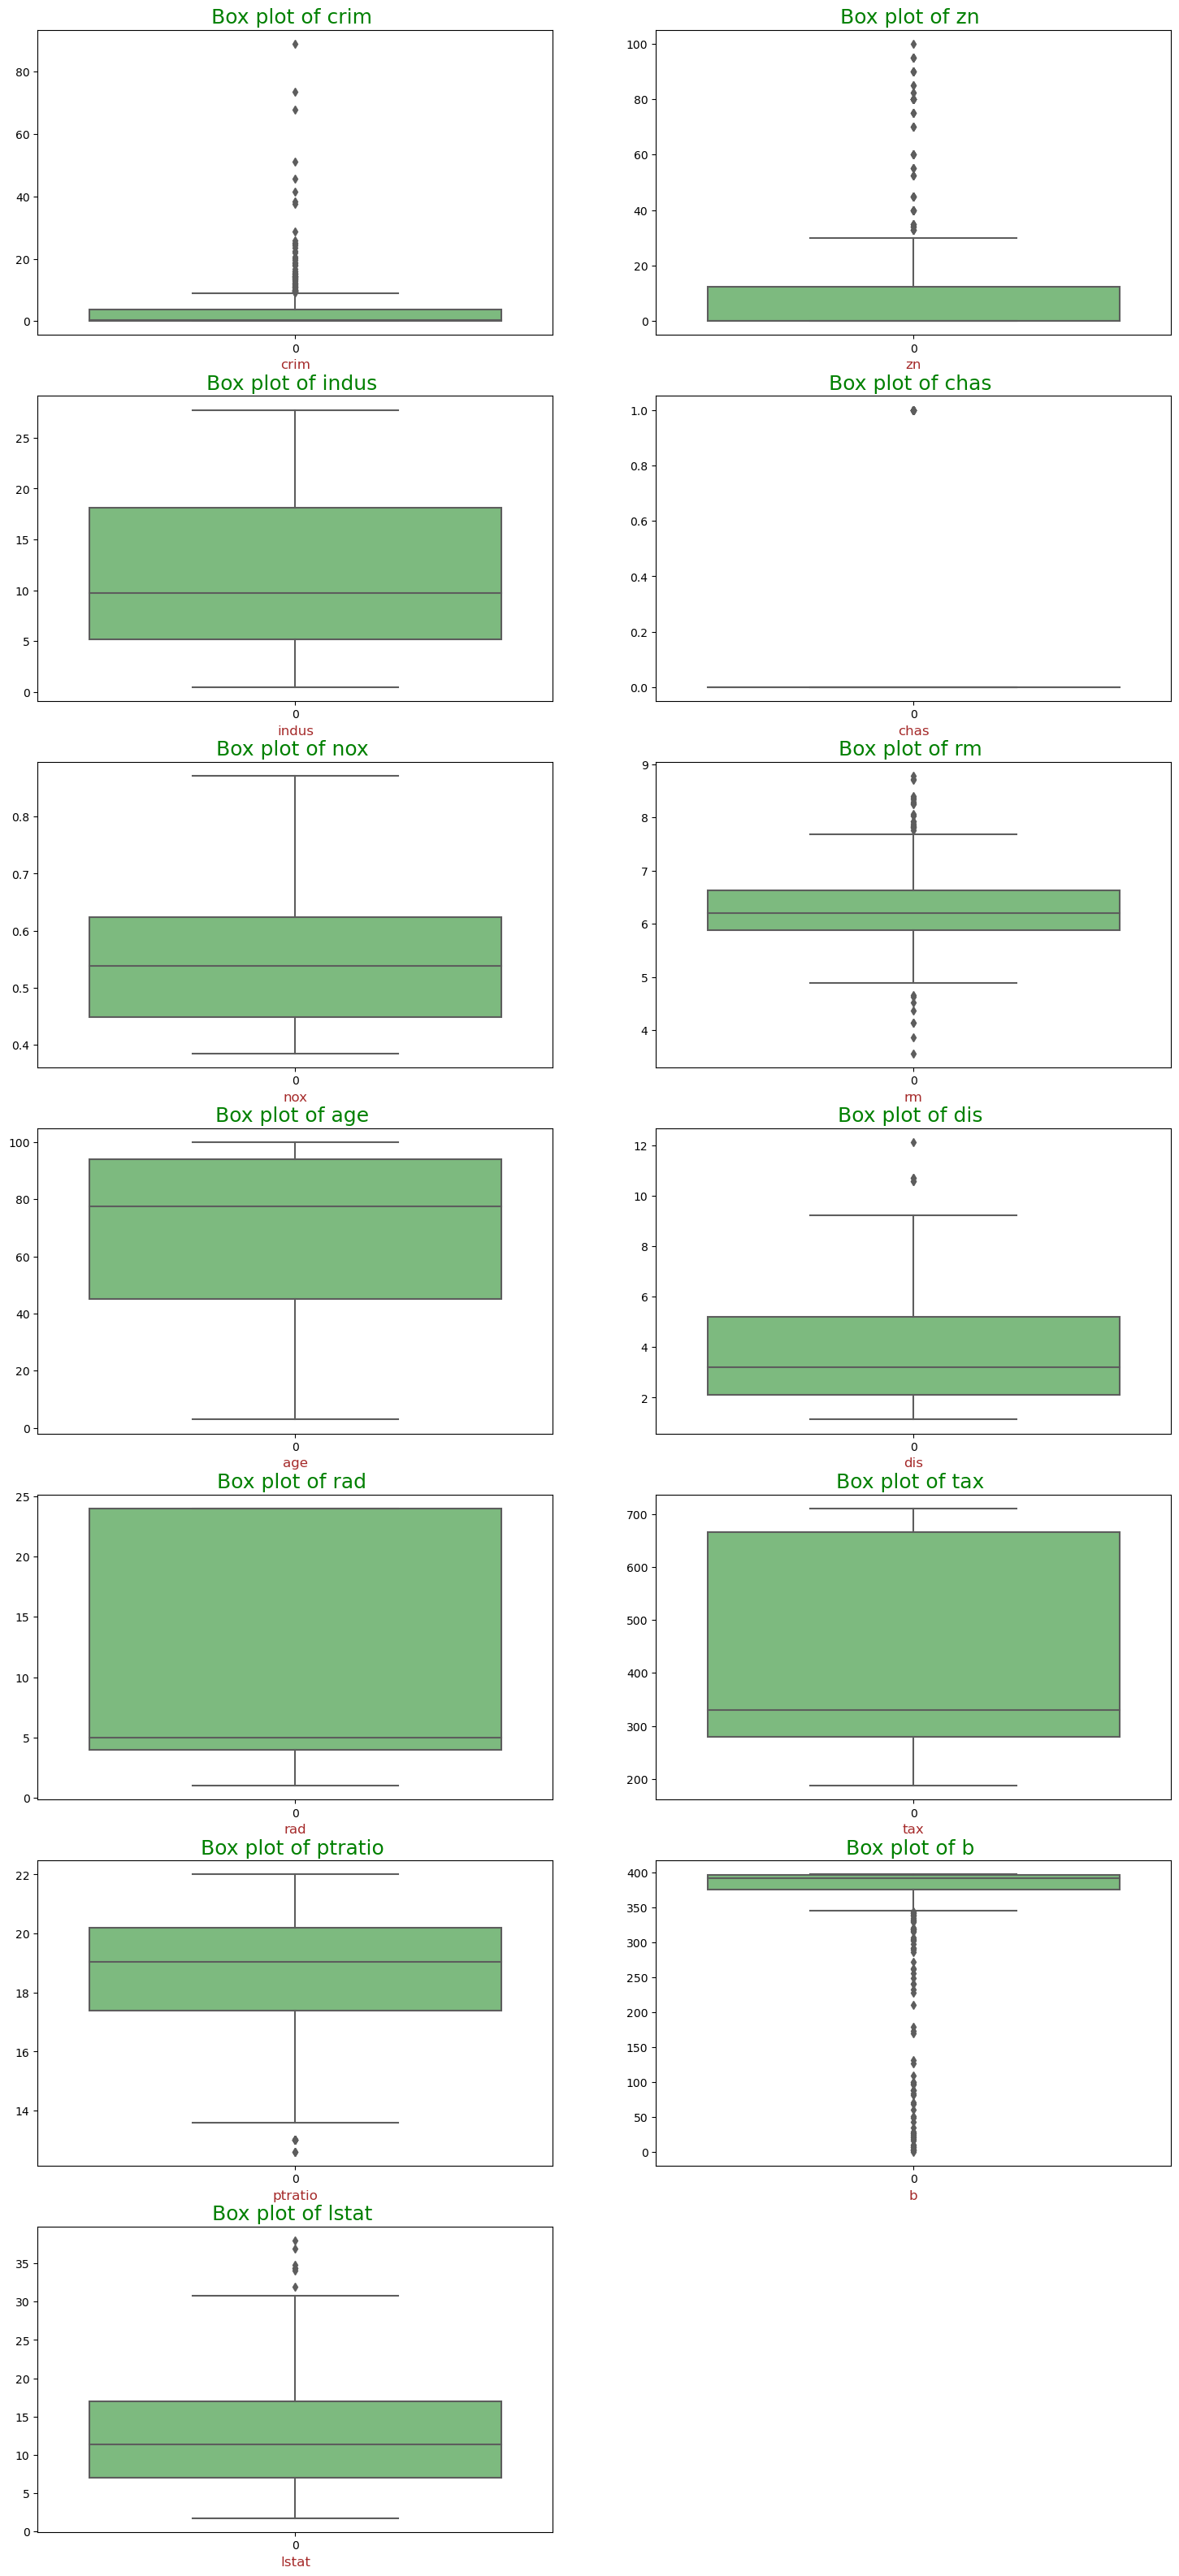

In [50]:
plt.figure(figsize=[18, 40])
for i, col in enumerate(cols, 1):
    plt.subplot(7,2,i)
    title_text= f'Box plot of {col} '
    x_label= f'{col}'
    fig=sns.boxplot(data= housing[col], palette= 'Greens')
    fig.set_title(title_text, fontdict= { 'fontsize': 18, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Brown'})
plt.show()

## 2.4 Split the training and testing set

In [27]:
y= housing['medv_log_trans']
X= housing.drop('medv_log_trans',axis=1)
X= X.drop('medv',axis=1)
#X.head()

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, random_state= 42)

In [34]:
X_train.shape

(354, 13)

In [35]:
X_test.shape

(152, 13)

In [36]:
y_train.shape

(354,)

In [37]:
y_test.shape

(152,)

In [39]:
# Getting index values of train test dataset
train_index= X_train.index
test_index= X_test.index

## 2.5 Rescale the variables due to the existences of outliers

In [59]:
num_cols= housing.columns.tolist()
num_cols.remove('medv_log_trans')
num_cols.remove('medv')
scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(X_train[num_cols])
X_train[num_cols]= scaler.transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

In [60]:
X_train[num_cols].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,-0.009315,0.0,-0.314168,0.0,-0.169873,0.060810,-0.206777,0.390520,-0.086957,-0.228330,0.012195,0.006725,-0.207001
116,-0.005134,0.0,0.013387,0.0,0.019111,-0.015465,-0.053773,-0.049851,0.043478,0.215645,-0.097561,0.004537,0.040386
45,-0.003497,0.0,-0.116297,0.0,-0.191107,-0.163811,-0.482848,0.263408,-0.086957,-0.205074,-0.085366,0.014143,-0.025898
16,0.032773,0.0,-0.064842,0.0,0.000000,-0.087836,-0.532741,0.183874,-0.043478,-0.048626,0.292683,-0.012676,-0.157378
468,0.629592,0.0,0.351818,0.0,0.089183,-0.090539,-0.070404,-0.026287,0.826087,0.710359,0.195122,-0.061004,0.260969


In [63]:
y_train

5      3.356897
116    3.054001
45     2.960105
16     3.139833
468    2.949688
         ...   
106    2.970414
270    3.049273
348    3.198673
435    2.595255
102    2.923162
Name: medv_log_trans, Length: 354, dtype: float64

In [73]:
y_train.sort_values()

405    1.609438
400    1.722767
399    1.840550
385    1.974081
415    1.974081
         ...   
257    3.912023
370    3.912023
368    3.912023
166    3.912023
283    3.912023
Name: medv_log_trans, Length: 354, dtype: float64

# 3.Build the Lasso regression model

## 3.1 Find the optimal alpha

### 3.1.1 Get alpha's rough location in [0,1]

In [65]:
range1= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # an array of alpha candidates
params_grid= {'alpha': range1} #searching over different values of ‘alpha’ 
lasso= Lasso(random_state= 42)
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)  #perform the grid search and find the best hyperparameters for the Lasso model on training data.       

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
lasso_gcv.best_estimator_

Lasso(alpha=0.001, random_state=42)

In [68]:
lasso_gcv.best_score_

-0.14309131833377245

In [70]:
actual_MAE=-lasso_gcv.best_score_
actual_MAE

0.14309131833377245

### 3.1.2 Find the optimal alpha around 0.001

In [71]:
range2= [0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, .0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .001]
params_grid= {'alpha': range2}
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)     

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001,
                                   0.0002, 0.0003, 0.0004, 0.0005, 0.0006,
                                   0.0007, 0.0008, 0.0009, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
lasso_gcv.best_estimator_

Lasso(alpha=0.001, random_state=42)

## 3.2 Fit the Lasso model using alpha=0.001

In [74]:
lasso_model= lasso_gcv.best_estimator_
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=42)

## 3.3 Evaluate the model using the testing set and MSE 

In [76]:
from sklearn.metrics import mean_squared_error

In [78]:
y_test_pred= lasso_model.predict(X_test)
print( 'MSE on testing dataset:', mean_squared_error(y_test, y_test_pred))

MSE on testing dataset: 0.03838649167639508


In [84]:
# 顺便查一下R^2
from sklearn.metrics import r2_score
print( 'r2 score on testing dataset:', r2_score(y_test, y_test_pred))

r2 score on testing dataset: 0.7505718946623197


## 3.4 Features selected by Lasso regression

In [79]:
lasso_coef= pd.Series(lasso_model.coef_, index= X_train.columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Features selected by Lasso:', selected_features)

Features selected by Lasso: 12


In [82]:
lasso_coef[lasso_coef != 0]

crim      -0.239011
zn         0.023158
chas       0.102116
nox       -0.211694
rm         0.324811
age       -0.000972
dis       -0.252951
rad        0.119919
tax       -0.089718
ptratio   -0.270526
b          0.197151
lstat     -0.837813
dtype: float64

In [80]:
top5_features_l=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(5).index]
top5_features_l

lstat     -0.837813
rm         0.324811
ptratio   -0.270526
dis       -0.252951
crim      -0.239011
dtype: float64

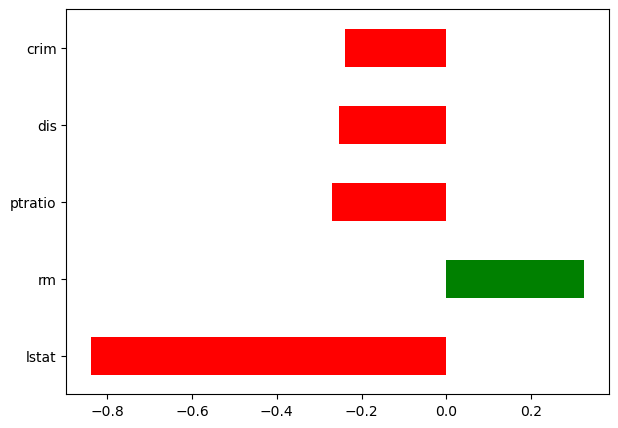

In [83]:
plt.figure(figsize= (7, 5))
top5_features_l.plot.barh(color= (top5_features_l > 0).map({True: 'g', False: 'r'}))
plt.show()

# 4. Conclusion

### Among 13 features, 12 are selected by Lasso to model the house price. Among them, crim, dis,ptratio,rm,Istat are the 5 most important features.